<hr/>

<b>Notebook Summary</b>

These notes are based on Prof. Norman Wildberger's lectures on Dynamics on Graphs which can be found <a href="https://www.youtube.com/c/WildEggmathematicscourses/featured">here</a>. 
    
They notes are are being hosted at my website <a href="https://www.ladatavita.com/">ladatavita.com</a> and the Jupyter notebook is also available from my Github repo at: <a href="https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks">https://github.com/jgab3103/Jamie-Gabriel/tree/main/MathNotebooks</a>

The purpose of this notebook is a continuation where we left off in the previous notebook ES1_2, which introduced some basic properties of graphs and provided some initial examples and proofs that demonstrate these properties. 

This notebook will continue the investigation, but will start to add some more structure to our investigation, and examine the properties of graph populations. Also in this notebook, I have taken the opportunity to clean up some of the functions I am using to create graphs and manage mutations, and, have also stopped using the visnetwork package in favour of networkx/matplotlib in order to leverage some simpler matplotlib formatting functions.  

<hr/>

In [4]:
import pyvis.network as nt
import numpy as np
import sympy as sp
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import networkx as nx
import string
import random

<hr/>
<b>Aim</b>: Create some functions to allow the continued investigation structure in simple graphs
<hr/>

<b>Observe</b>: Recall from the previous notebook that successively applying the $ps_x$ mutation function would sometimes lead to a finite set of root populations and these cases appear to be related to certain graph types. In particular, some instances of $A_n$ and $D_6$ were used to test this.   

<b>Observe</b>: It is possible to put more rigor by looking at those instances which will definitely not lead to finite sets. 

<b>Let</b> $F1, F2$ and $F3$ be functions to create graphs given connections of edges, carry out the $ps_x$ function, and test this function over a chosen amoont of iterations

In [5]:
def F1(edges=None):
    
    verticeLabels = list(set([item for sublist in edges for item in sublist]))
    randomNumberToIntialiseSingletonPopulation = random.randint(0, len(verticeLabels) - 1)

    vertices = [(verticeLabels[i], {"population": 0}) for i in range(len(verticeLabels))]
    graph = nx.Graph()
    graph.add_nodes_from(vertices)
    graph.add_edges_from(edges)
    
    graph.nodes[verticeLabels[randomNumberToIntialiseSingletonPopulation]]['population'] = 1
    
    return(graph)

def F2(graph = None, nodeChoice = None, printSummary = True, 
       returnUpdatedGraph = False, 
       returnListOfPopulations = False,
      returnAllAsDict = False):
   
    edgesOfChosenNode = list(nx.edges(graph, [nodeChoice]))
   
    neigborOfChosenNode = [edgesOfChosenNode[i][1] for i in range(len(list(edgesOfChosenNode)))]
    nodeChoicePopulation = graph.nodes[nodeChoice]['population']
    sumOfNeighborsOfChosenNode = np.sum([graph.nodes[i]['population'] for i in neigborOfChosenNode])
    populationOfNode = -nodeChoicePopulation + sumOfNeighborsOfChosenNode
    updatedGraph = graph.copy()
    updatedGraph.nodes[nodeChoice]['population'] = populationOfNode

    newPopulations = [updatedGraph.nodes[i]['population'] for i in list(updatedGraph)]
    if printSummary:
        print("Node choice", 
              nodeChoice,
              "\nNode details",
              nx.nodes(graph)[nodeChoice],
              "\nChange in node population ",
              nx.nodes(graph)[nodeChoice]['population'], 
              "->", 
              populationOfNode)
        print("Updated node populations of graph: ", newPopulations, "\n")

    if returnUpdatedGraph: 
        return(updatedGraph)
    
    if returnListOfPopulations:
        return(np.array(newPopulations))
    
    if returnAllAsDict:
        return({"graph": updatedGraph,
               "population": np.array(newPopulations)})
    
def F3(graphChoice=None, vertices = [], iterations=5, returnPopulations = True, iterateThroughAllVertices = True):
    listOfAllPopulations = []
    graph = graphChoice
    
    if iterateThroughAllVertices:
        vertices = graph.nodes
    
    for i in range(iterations):
        for j in vertices:
            udpatedGraphAndPopulation = F2(graph, j, returnAllAsDict=True, printSummary = False)
            graph = udpatedGraphAndPopulation['graph']
            population = udpatedGraphAndPopulation['population']
            listOfAllPopulations.append(population)
            
    print("Number of unique populations: ", len(list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))))
    if returnPopulations:
        setOfAllPopulations = list(set([tuple(i) for i in [list(i) for i in listOfAllPopulations]]))
        return({"iterations":iterations,
               "populationAsSetCount":len(setOfAllPopulations),
                "populationAsListCount":len(listOfAllPopulations),
               "populationsAsSet": setOfAllPopulations,
               "populationsAsList": listOfAllPopulations})

<b>Let</b> $F4$ be an example of a graph created with the $F1$ function

In [12]:
F4 = F1(edges=[("a","b"),("b","c"),("c","d"),("d","e"),("e","f")] )

<b>Let</b> $F5$ be an example of a function that applies the $ps_x$ mutation to a given graph and vertice.

In [13]:
F5 = F2(graph=F4, nodeChoice='a')

Node choice a 
Node details {'population': 0} 
Change in node population  0 -> 1
Updated node populations of graph:  [1, 0, 1, 0, 0, 0] 



<b>Let</b> $F6$ be an example of a function that applies the $ps_x$ mutation to a chosen set of nodes over  chosen set of iterations. 

In [14]:
F6 = F3(graphChoice=F4, iterations=10, returnPopulations=True)

Number of unique populations:  22


<hr/>

<b>Aim</b>: Use the functions to ascertain situations where all the count of possible roots of a graph, denoted $R(X)$ will not be finite

<hr/>

<b>Strategy</b>: Assume that $X$ is a Simple Graph with a finite root population. Let's begin deduce the characteristics it can not have

<b>Observe</b>: Recall the Simple Graph $A_n$ and note that it differs to to $A_n \text{~}$ only in the manner that one more edge gets created. 

<b>Let</b>: $F7$ and $F8$ be examples of an  $A_n$ and  $A_n \text{~}$ graph

In [16]:
F7 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e")] )
F8 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e"), ("e","a")] )

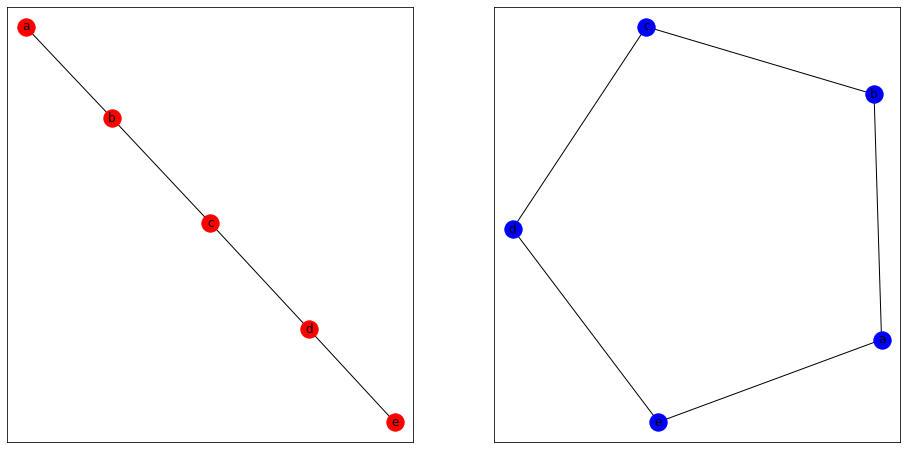

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos1 = nx.spring_layout(F7)
pos2 = nx.spring_layout(F8)

nx.draw_networkx(F7, pos1, ax=ax1, node_color='r')
nx.draw_networkx(F8, pos2, ax=ax2, node_color='b')

<b>Observe</b>: that this change (in which a single edge is added to an existing graph) makes it impossible for the root populations to be finite. 

<b>Let</b> $F9$ and $F10$ be the number of root populations after 2000 iterations of $F7$ and $F8$. 

In [8]:
F9 = F3(graphChoice=F7, iterations=2000, returnPopulations=True)
F10 = F3(graphChoice=F8, iterations=2000, returnPopulations=True)

Number of unique populations:  18
Number of unique populations:  6667


<b>Observe</b>: After 6 iterations, the number of of root populations reaches 18 for $F7$ and appears not to go any higher. In contrast, $F10$ appears to keep on increasing

<b>Observe</b>: This suggests that whatever $X$ is as a finite group of population, it must have a tree structure(in which any two verticies are connected by exactly one path)


<b>Definition</b>: A graph, here denoted $G$, has a <b>Tree</b> structure if it has the following properties: 

- All vertices are connected and the graph is acyclic (contains no cycles).
- When G is acyclic, and a simple cycle is formed if any edge is added to G.
- G is connected, but would become disconnected if any single edge is removed from G.
- G is connected and the 3-vertex complete graph K3 is not a minor of G.
- Any two vertices in G can be connected by a unique simple path.

<b>Let</b> $F11$ and $F12$ be simple graphs of  $D_4$ and $D_4 \text{~}$

In [9]:
F11 = F1(edges=[("a","b"),("b","c"),("b","d")] )
F12 = F1(edges=[("a","b"),("b","c"),("b","d"), ("b","e")] )

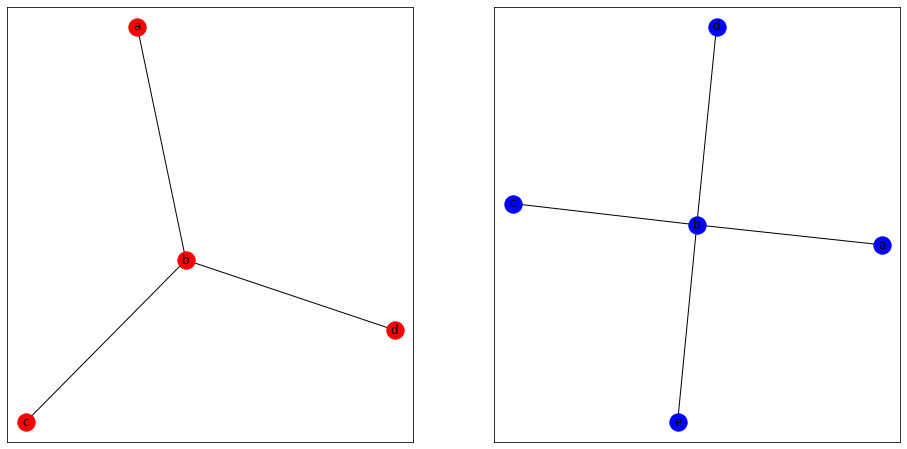

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos1 = nx.spring_layout(F11)
pos2 = nx.spring_layout(F12)

nx.draw_networkx(F11, pos1, ax=ax1, node_color='r')
nx.draw_networkx(F12, pos2, ax=ax2, node_color='b')

In [11]:
F13 = F3(graphChoice=F11, iterations=2000, returnPopulations=True)
F14 = F3(graphChoice=F12, iterations=2000, returnPopulations=True)

Number of unique populations:  14
Number of unique populations:  7000


<b>Observe</b> that after 5 iterations applying the mutation function to all vertices, it reaches an apparent finite number of populations (14)

<b>Let</b> $F15$ be the first 10 records returned from F14, showing the increase in root populations. 

In [12]:
F15 = [print(i) for i in F14['populationsAsList'][0:10]][0]
F15

[1 1 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[1 0 0 0 0]
[-1  0  0  0  0]
[-1 -1  0  0  0]
[-1 -1 -1  0  0]
[-1 -1 -1 -1  0]
[-1 -1 -1 -1 -1]


<b>Observe</b> that the above suggests that the $D_4 \text{~}$ structure cannot be supported by the $X$ and that the degree of each vertice must be less than 4.  

<b>Observe</b>: It is possible to extend $D_4$ an example of a more general case of $D_n$ and compare it with $D_n \text{~}$

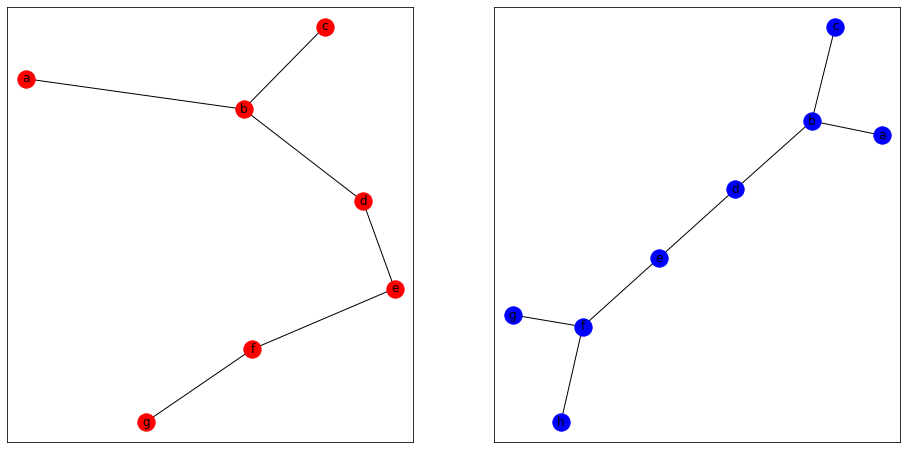

In [13]:
F16 = F1(edges=[("a","b"),("b","c"),("b","d"), ("d","e"), ("e","f"), ("f","g")] )
F17 = F1(edges=[("a","b"),("b","c"),("b","d"), ("d","e"), ("e","f"), ("f","g"), ("f", "h")] )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos1 = nx.spring_layout(F16)
pos2 = nx.spring_layout(F17)

nx.draw_networkx(F16, pos1, ax=ax1, node_color='r')
nx.draw_networkx(F17, pos2, ax=ax2, node_color='b')

In [14]:
F18 = F3(graphChoice=F16, iterations=40, returnPopulations=True)
F19 = F3(graphChoice=F17, iterations=40, returnPopulations=True)

Number of unique populations:  34
Number of unique populations:  153


<b>Observe</b>: This suggests that there cannot be more than 2 vertices of degree 3 in graph

<b>Observe</b> the difference between $E_6$ and $E_6 \text{~}$

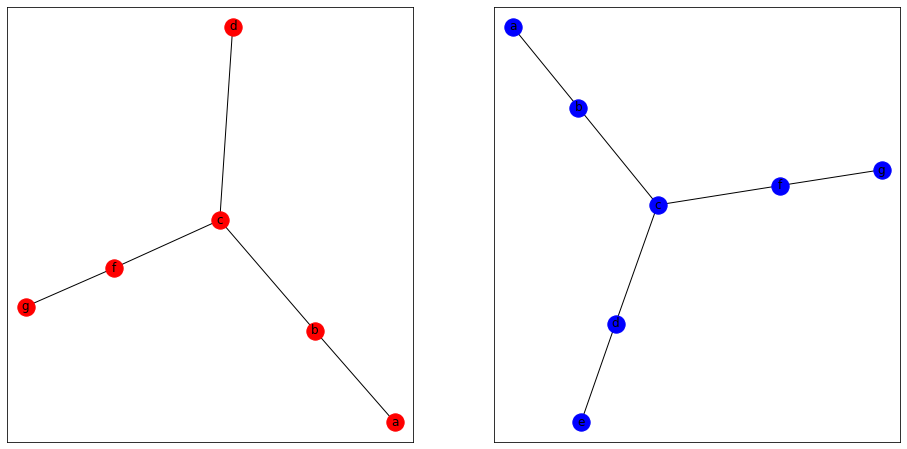

In [15]:
F20 = F1(edges=[("a","b"),("b","c"),("c","d"), ("c","f"), ("f","g")] )
F21 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e"), ("c","f"), ("f","g")] )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

pos1 = nx.spring_layout(F20)
pos2 = nx.spring_layout(F21)

nx.draw_networkx(F20, pos1, ax=ax1, node_color='r')
nx.draw_networkx(F21, pos2, ax=ax2, node_color='b')

In [16]:
F22 = F3(graphChoice=F20, iterations=50, returnPopulations=True)
F23 = F3(graphChoice=F21, iterations=50, returnPopulations=True)

Number of unique populations:  32
Number of unique populations:  218


so cant'be sitting inside as a sub graph

<b>Observe</b> it is possible to consider $E_7$ and $E_7 \text{~}$

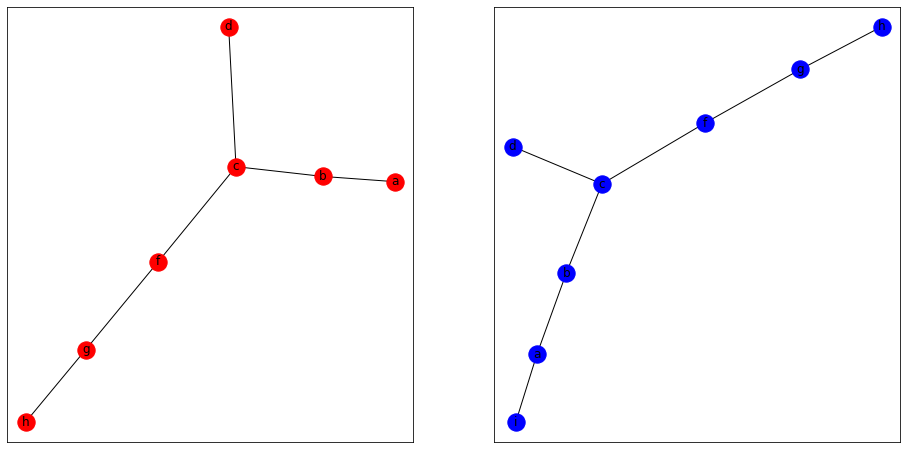

In [17]:
F24 = F1(edges=[("a","b"),("b","c"),("c","d"), ("c","f"), ("f","g"), ("g","h")] )
F25 = F1(edges=[("a","b"),("b","c"),("c","d"), ("c","f"), ("f","g"), ("g","h"), ("a", "i")] )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


nx.draw_networkx(F24, ax=ax1, node_color='r')
nx.draw_networkx(F25, ax=ax2, node_color='b')

In [18]:
F26 = F3(graphChoice=F24, iterations=100, returnPopulations=True)
F27 = F3(graphChoice=F25, iterations=100, returnPopulations=True)

Number of unique populations:  52
Number of unique populations:  420


<b>Observe</b> it is possible to consider $E_8$ and $E_8 \text{~}$

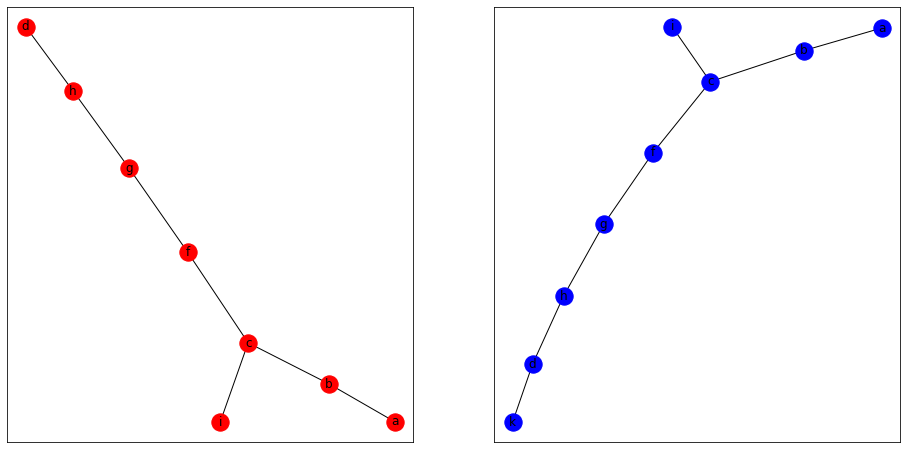

In [19]:
F28 = F1(edges=[("a","b"),("b","c"),("h","d"), ("c","f"), ("f","g"), ("g","h"), ("c","i")] )
F29 = F1(edges=[("a","b"),("b","c"),("h","d"), ("c","f"), ("f","g"), ("g","h"), ("c","i"), ("d","k")] )



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))


nx.draw_networkx(F28, ax=ax1, node_color='r')
nx.draw_networkx(F29, ax=ax2, node_color='b')

In [20]:
F30 = F3(graphChoice=F28, iterations=1000, returnPopulations=True)
F31 = F3(graphChoice=F29, iterations=1000, returnPopulations=True)

Number of unique populations:  80
Number of unique populations:  4069


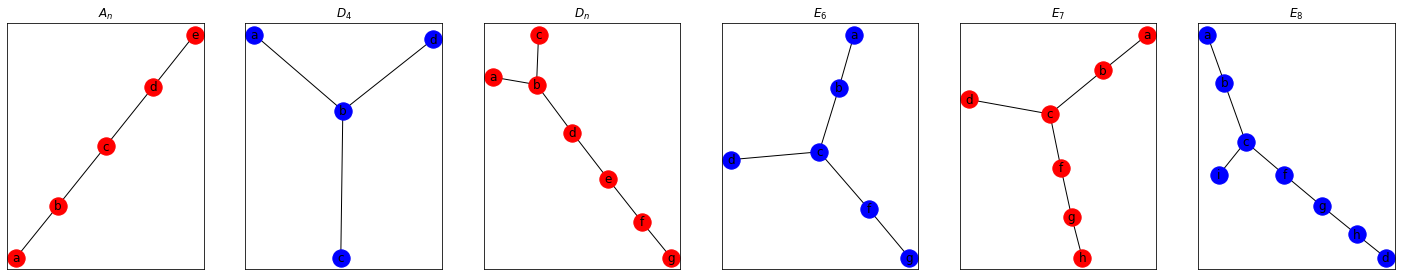

In [21]:
F32 = F1(edges=[("a","b"),("b","c"),("c","d"), ("d","e")] )
F33 = F1(edges=[("a","b"),("b","c"),("b","d")] )
F34 = F1(edges=[("a","b"),("b","c"),("b","d"), ("d","e"), ("e","f"), ("f","g")] )

F35 = F1(edges=[("a","b"),("b","c"),("c","d"), ("c","f"), ("f","g")] )
F36 = F1(edges=[("a","b"),("b","c"),("c","d"), ("c","f"), ("f","g"), ("g","h")] )
F37 = F1(edges=[("a","b"),("b","c"),("h","d"), ("c","f"), ("f","g"), ("g","h"), ("c","i")] )

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, figsize=(20, 4))

plt.tight_layout()

ax1.set_title('$A_n$')
ax2.set_title('$D_4$')
ax3.set_title('$D_n$')
ax4.set_title('$E_6$')
ax5.set_title('$E_7$')
ax6.set_title('$E_8$')


nx.draw_networkx(F32, ax=ax1, node_color='r')
nx.draw_networkx(F33, ax=ax2, node_color='b')
nx.draw_networkx(F34, ax=ax3, node_color='r')
nx.draw_networkx(F35, ax=ax4, node_color='b')
nx.draw_networkx(F36, ax=ax5, node_color='r')
nx.draw_networkx(F37, ax=ax6, node_color='b')

<b>Observe</b> that as a general aside, the difference between the graphs above, and the $\text{~}$ graphs comes about when trying to make the graphs more symmetrical, or in the case of $E_8$, less symmetrical.

<b>Observe</b> that this investigation has shown that a finite population of roots, denoted as $X$ must have the following characteristics:  


- It must be a tree ($A_n$)
- Each verticie must be degree 3 or less ($D_4, D_n$) 
- Only 1 vertice can have degree 3
- If the edges coming from a degree 3 vertice are denoted as $p$, $q$, $r$ (in the case of all graphs except $A_n$) then:
    - $p$, $q, r$ cannot both be equal to 3 (being the difference between $E_6$ and $E_6 \text{~}$)
    - $p$ and $q$, cannot both be greater than or equal to 4 (being the difference between $E_7$ and $E_7 \text{~}$)
    - a single cannot branch cannot have $q$ greater than 5 (being the difference between $E_8$ and $E_8 \text{~}$)




<hr/>

<b>Summary</b>: This investigation shows that specific situations where changes can be made to ADE graphs which will ensure they cannot have finite root populations. However it does not explore the question when, given a specific graph, whether it is an ADE graph or not. 

<hr/>